# Imports

In [957]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
import pickle

# Importing file and descriptive analysis

In [854]:
df = pd.read_parquet("Dataset/trainset.parquet")

In [855]:
df.head(5)

,order_id,product_id,seller_id,customer_unique_id,delivery_delay_hours,seller_state,customer_state,review_score,price,freight_value,seller_grade,product_category_name_english,product_description_lenght,product_photos_qty,time_to_ship_hours,purchase_count,avg_review_score,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,7c396fd4830fd04220f754e42b4e5bff,-170.579722,SP,SP,4,29.99,8.72,Mediocre,housewares,268.0,4.0,56.974167,53,4.415094,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,af07308b275d755c9edb36a90c618231,-128.537500,SP,BA,4,118.70,22.76,Mediocre,perfumery,178.0,1.0,41.823056,110,4.579365,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,3a653a41f6f9fc3d2a113cf8398680e8,-413.891944,SP,GO,5,159.90,19.22,Mediocre,auto,232.0,1.0,5.186389,1124,4.122822,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,7c142cf63193a1473d2e66489a9ae977,-311.521667,MG,RN,5,45.00,27.20,Mediocre,pet_shop,468.0,3.0,90.198056,150,4.451613,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,72632f0f9dd73dfee390c9b22eb56dd6,-221.716111,SP,SP,5,19.90,8.72,Mediocre,stationery,316.0,4.0,22.465278,124,3.923977,2018-02-13 21:18:39


In [856]:
df.shape

(108449, 18)

In [857]:
df.isnull().sum()

order_id                         0
product_id                       0
seller_id                        0
customer_unique_id               0
delivery_delay_hours             0
seller_state                     0
customer_state                   0
review_score                     0
price                            0
freight_value                    0
seller_grade                     0
product_category_name_english    0
product_description_lenght       0
product_photos_qty               0
time_to_ship_hours               0
purchase_count                   0
avg_review_score                 0
order_purchase_timestamp         0
dtype: int64

In [858]:
df.describe()

,delivery_delay_hours,review_score,price,freight_value,product_description_lenght,product_photos_qty,time_to_ship_hours,purchase_count,avg_review_score
count,108449.000000,108449.000000,108449.000000,108449.000000,108449.000000,108449.000000,108449.000000,108449.000000,108449.000000
mean,-273.167892,4.083385,119.791783,19.967151,786.347112,2.207969,78.587116,377.020009,4.045760
std,242.091773,1.345637,180.491351,15.700173,650.816261,1.719895,86.622575,490.328610,0.370936
min,-3504.386944,1.000000,0.850000,0.000000,4.000000,1.000000,-4109.098056,1.000000,1.000000
25%,-391.941944,4.000000,39.900000,13.080000,347.000000,1.000000,27.273889,51.000000,3.880000
50%,-289.457222,5.000000,74.900000,16.280000,601.000000,1.000000,53.462222,152.000000,4.069575
75%,-156.294444,5.000000,134.000000,21.150000,985.000000,3.000000,98.654444,477.000000,4.237113
max,4535.401944,5.000000,6735.000000,409.680000,3992.000000,20.000000,2569.550556,1838.000000,5.000000


In [859]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108449 entries, 0 to 108448
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       108449 non-null  object 
 1   product_id                     108449 non-null  object 
 2   seller_id                      108449 non-null  object 
 3   customer_unique_id             108449 non-null  object 
 4   delivery_delay_hours           108449 non-null  float64
 5   seller_state                   108449 non-null  object 
 6   customer_state                 108449 non-null  object 
 7   review_score                   108449 non-null  int64  
 8   price                          108449 non-null  float64
 9   freight_value                  108449 non-null  float64
 10  seller_grade                   108449 non-null  object 
 11  product_category_name_english  108449 non-null  object 
 12  product_description_lenght    

In [860]:
# Removing columns that are unique IDs and not useful for training
df.drop(['order_id','product_id','seller_id','customer_unique_id'], axis=1, inplace=True)

In [861]:
#Dropping product_description_length, product_photos_qty,seller_state,customer_state
df.drop(['product_description_lenght','product_photos_qty','seller_state','customer_state'], axis=1, inplace=True)

In [862]:
df.nunique()

delivery_delay_hours             90071
review_score                         5
price                             5774
freight_value                     6880
seller_grade                         3
product_category_name_english       71
time_to_ship_hours               85737
purchase_count                     244
avg_review_score                   806
order_purchase_timestamp         93983
dtype: int64

In [863]:
df.shape

(108449, 10)

In [864]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108449 entries, 0 to 108448
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   delivery_delay_hours           108449 non-null  float64
 1   review_score                   108449 non-null  int64  
 2   price                          108449 non-null  float64
 3   freight_value                  108449 non-null  float64
 4   seller_grade                   108449 non-null  object 
 5   product_category_name_english  108449 non-null  object 
 6   time_to_ship_hours             108449 non-null  float64
 7   purchase_count                 108449 non-null  int64  
 8   avg_review_score               108449 non-null  float64
 9   order_purchase_timestamp       108449 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 8.3+ MB


# Train-Test split

In [865]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=16501)

In [866]:
X_train = train_df.drop(columns=['price'])

In [867]:
y_train = train_df['price']

In [868]:
print(X_train.shape)
print(y_train.shape)

(86759, 9)
(86759,)


In [869]:
X_test = test_df.drop(columns=['price'])

In [870]:
y_test = test_df['price']

In [871]:
print(X_test.shape)
print(y_test.shape)

(21690, 9)
(21690,)


# Working on each Column (for train-split)

## Price(train-split(target))

In [872]:
y_train.head()

861       119.99
44915      79.49
26798     116.00
104303    249.99
58404      49.95
Name: price, dtype: float64

In [873]:
y_train.describe()


count    86759.000000
mean       119.999669
std        181.629718
min          0.850000
25%         39.900000
50%         74.900000
75%        134.900000
max       6735.000000
Name: price, dtype: float64

<Axes: >

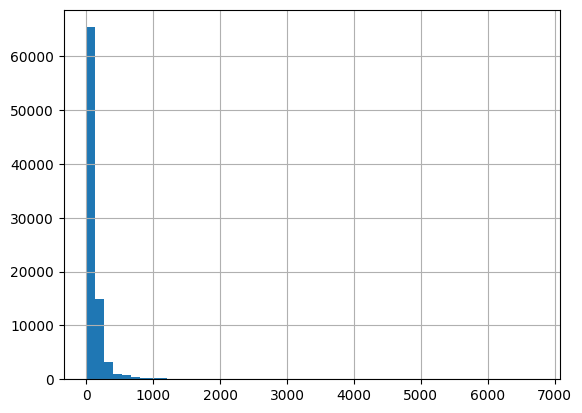

In [874]:
y_train.hist(bins=50)

We will be building ensemble regression models. so we dont need to logTransform/normalize the price column.

## Delivery_delay_hours(train-split)

In [875]:
X_train.shape

(86759, 9)

In [876]:
X_train['delivery_delay_hours'].head()

861      -409.934722
44915     -28.242222
26798    -191.249722
104303    -97.724722
58404    -461.919722
Name: delivery_delay_hours, dtype: float64

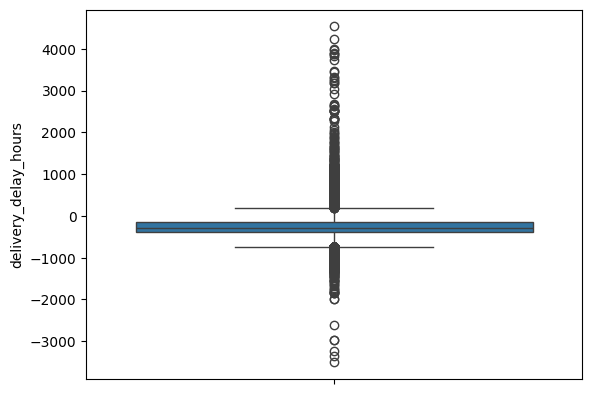

In [877]:
sns.boxplot(X_train['delivery_delay_hours'])
plt.show()

#### As the data points are extremly skewed and also have lots of negative values, we cannot apply box-cox

#### Finding percentile values and applying it and making categories based on percentiles

In [878]:
#finding percentile values
percentiles = X_train['delivery_delay_hours'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
print(percentiles)

0.05   -627.966333
0.25   -391.854028
0.50   -289.438333
0.75   -156.798611
0.95     84.991083
Name: delivery_delay_hours, dtype: float64


In [879]:
# Compute quantiles
q25 = X_train['delivery_delay_hours'].quantile(0.25)
q50 = X_train['delivery_delay_hours'].quantile(0.50)
q75 = X_train['delivery_delay_hours'].quantile(0.75)
q95 = X_train['delivery_delay_hours'].quantile(0.95)

# Function with fixed ±3 days window for "On Time"
def categorize_delay(x):
    if -72 <= x <= 72:  # strictly define "On Time"
        return 'On Time'
    elif x <= q25:
        return 'Very Early'
    elif q25 < x <= q50:
        return 'Early'
    elif q50 < x <= q75:
        return 'Early'
    elif q75 < x <= q95:
        return 'Late'
    else:
        return 'Very Late'

# Apply function
X_train['delay_category'] = X_train['delivery_delay_hours'].apply(categorize_delay)

# Check results
print(X_train['delay_category'].value_counts())


delay_category
Early         43379
Very Early    21690
Late          10771
On Time        6581
Very Late      4338
Name: count, dtype: int64


In [880]:
#dropping original delivery_delay_hours
X_train.drop(['delivery_delay_hours'],axis = 1, inplace = True)

##### Need to do one hot encoding

In [881]:
X_train['delay_category'].value_counts()

delay_category
Early         43379
Very Early    21690
Late          10771
On Time        6581
Very Late      4338
Name: count, dtype: int64

In [882]:
X_train.shape

(86759, 9)

In [883]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86759 entries, 861 to 71631
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   review_score                   86759 non-null  int64  
 1   freight_value                  86759 non-null  float64
 2   seller_grade                   86759 non-null  object 
 3   product_category_name_english  86759 non-null  object 
 4   time_to_ship_hours             86759 non-null  float64
 5   purchase_count                 86759 non-null  int64  
 6   avg_review_score               86759 non-null  float64
 7   order_purchase_timestamp       86759 non-null  object 
 8   delay_category                 86759 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 6.6+ MB


## Review Score(train-split)

In [884]:
X_train.shape

(86759, 9)

In [885]:
X_train['review_score'].value_counts()

review_score
5    49994
4    16631
1     9898
3     7335
2     2901
Name: count, dtype: int64

As the review_score column is a bit skewed towards '5' and '4', we will apply class_weights during model training

## freight_value(train-split)

In [886]:
X_train['freight_value'].describe()

count    86759.000000
mean        19.993846
std         15.661498
min          0.000000
25%         13.080000
50%         16.310000
75%         21.150000
max        375.280000
Name: freight_value, dtype: float64

<Axes: >

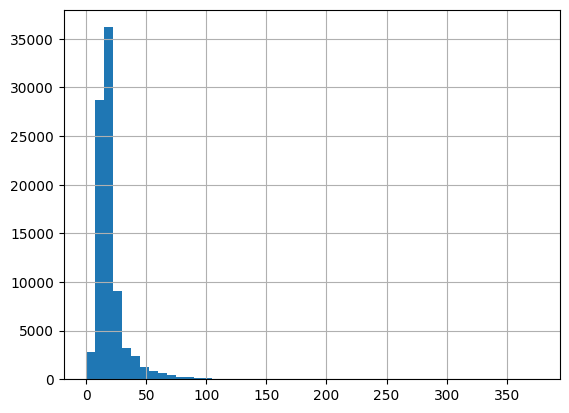

In [887]:
X_train['freight_value'].hist(bins=50)

In [888]:
# Combine X_train and y_train to compute correlation
train_corr_df = X_train.copy()
train_corr_df['price'] = y_train

train_corr_df[['price', 'freight_value']].corr()


,price,freight_value
price,1.000000,0.411111
freight_value,0.411111,1.000000


The freight_value and price columns are not too highly correlated which is good

#### log transforming the freight_values column to handle skewness

In [889]:
X_train['freight_value_log'] = np.log1p(X_train['freight_value'])

In [890]:
X_train.drop(['freight_value'],axis = 1,inplace = True)

In [891]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86759 entries, 861 to 71631
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   review_score                   86759 non-null  int64  
 1   seller_grade                   86759 non-null  object 
 2   product_category_name_english  86759 non-null  object 
 3   time_to_ship_hours             86759 non-null  float64
 4   purchase_count                 86759 non-null  int64  
 5   avg_review_score               86759 non-null  float64
 6   order_purchase_timestamp       86759 non-null  object 
 7   delay_category                 86759 non-null  object 
 8   freight_value_log              86759 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.6+ MB


## Seller_grade(train-split)

In [892]:
X_train['seller_grade'].value_counts()

seller_grade
Mediocre    70323
Bad         13421
Super        3015
Name: count, dtype: int64

#### Will do one label encoding on seller_grade column

In [893]:
label_map = {'Bad': 0,'Mediocre': 1,'Super': 2}

In [894]:
X_train['seller_grade'] = X_train['seller_grade'].replace(label_map).astype(int)

C:\Users\shubu\AppData\Local\Temp\ipykernel_21240\1308378079.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['seller_grade'] = X_train['seller_grade'].replace(label_map).astype(int)


In [895]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86759 entries, 861 to 71631
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   review_score                   86759 non-null  int64  
 1   seller_grade                   86759 non-null  int64  
 2   product_category_name_english  86759 non-null  object 
 3   time_to_ship_hours             86759 non-null  float64
 4   purchase_count                 86759 non-null  int64  
 5   avg_review_score               86759 non-null  float64
 6   order_purchase_timestamp       86759 non-null  object 
 7   delay_category                 86759 non-null  object 
 8   freight_value_log              86759 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 6.6+ MB


## product_category_name_english(train-split)

In [896]:
X_train['product_category_name_english'].describe()

count              86759
unique                71
top       bed_bath_table
freq                8747
Name: product_category_name_english, dtype: object

In [897]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(X_train['product_category_name_english'].value_counts())

product_category_name_english
bed_bath_table                             8747
health_beauty                              7573
sports_leisure                             6742
furniture_decor                            6534
computers_accessories                      6168
housewares                                 5428
watches_gifts                              4645
telephony                                  3502
garden_tools                               3416
auto                                       3285
toys                                       3175
cool_stuff                                 2953
perfumery                                  2656
baby                                       2366
electronics                                2199
stationery                                 1976
fashion_bags_accessories                   1607
pet_shop                                   1527
office_furniture                           1330
luggage_accessories                         857
consoles_g

#### As there are 71 unique groups, we can merge similar types of groups into 1 groups

##### Product Category Group Mapping

The original product_category_name_english column (71 categories) has been grouped into 13 meaningful categories for easier modeling:

| New Category Name              | Merged Original Categories |
|--------------------------------|---------------------------|
| **Home & Furniture**           | bed_bath_table, furniture_decor, office_furniture, furniture_living_room, furniture_bedroom, home_confort, home_comfort_2, kitchen_dining_laundry_garden_furniture, home_appliances, home_appliances_2, small_appliances, small_appliances_home_oven_and_coffee, home_construction, air_conditioning, construction_tools_construction, construction_tools_lights, construction_tools_safety, costruction_tools_garden, costruction_tools_tools |
| **Health & Beauty**             | health_beauty, perfumery, fashion_underwear_beach |
| **Sports & Leisure**            | sports_leisure, fashion_sport, musical_instruments, cine_photo, audio, dvds_blu_ray, music,cds_dvds_musicals |
| **Electronics & Computers**     | computers_accessories, electronics, computers, telephony, fixed_telephony, tablets_printing_image, consoles_games |
| **Baby & Kids**                 | baby, diapers_and_hygiene, fashion_childrens_clothes |
| **Fashion & Accessories**       | fashion_bags_accessories, fashion_shoes, fashion_male_clothing, fashio_female_clothing, watches_gifts |
| **Sports / Outdoors / Garden**  | garden_tools, auto, market_place |
| **Books**                        | books_general_interest, books_technical, books_imported |
| **Food & Drink**                 | food, food_drink, drinks, la_cuisine |
| **Pet & Animals**                | pet_shop |
| **Party & Seasonal**             | christmas_supplies, party_supplies |
| **Arts & Crafts**                | arts_and_craftmanship, art, flowers |
| **Misc / Other**                 | cool_stuff, security_and_services, luggage_accessories |


In [898]:
group_mapping = {}

# Home & Furniture
home_furniture = [
    'bed_bath_table', 'furniture_decor', 'office_furniture', 'furniture_living_room',
    'furniture_bedroom', 'home_confort', 'home_comfort_2', 'kitchen_dining_laundry_garden_furniture',
    'home_appliances', 'home_appliances_2', 'small_appliances', 'small_appliances_home_oven_and_coffee',
    'home_construction', 'air_conditioning', 'construction_tools_construction', 'construction_tools_lights',
    'construction_tools_safety', 'costruction_tools_garden', 'costruction_tools_tools',
    'housewares', 'furniture_mattress_and_upholstery','cds_dvds_musicals'
]
for i in home_furniture:
    group_mapping[i] = 'Home & Furniture'

# Health & Beauty
health_beauty = ['health_beauty', 'perfumery', 'fashion_underwear_beach']
for i in health_beauty:
    group_mapping[i] = 'Health & Beauty'

# Sports & Leisure
sports_leisure = ['sports_leisure', 'fashion_sport', 'musical_instruments', 'cine_photo', 'audio', 'dvds_blu_ray', 'music', 'toys']
for i in sports_leisure:
    group_mapping[i] = 'Sports & Leisure'

# Electronics & Computers
electronics_computers = ['computers_accessories', 'electronics', 'computers', 'telephony', 'fixed_telephony', 'tablets_printing_image', 'consoles_games']
for i in electronics_computers:
    group_mapping[i] = 'Electronics & Computers'

# Baby & Kids
baby_kids = ['baby', 'diapers_and_hygiene', 'fashion_childrens_clothes']
for i in baby_kids:
    group_mapping[i] = 'Baby & Kids'

# Fashion & Accessories
fashion_accessories = ['fashion_bags_accessories', 'fashion_shoes', 'fashion_male_clothing', 'fashio_female_clothing', 'watches_gifts']
for i in fashion_accessories:
    group_mapping[i] = 'Fashion & Accessories'

# Sports / Outdoors / Garden
sports_outdoors_garden = ['garden_tools', 'auto', 'market_place']
for i in sports_outdoors_garden:
    group_mapping[i] = 'Sports / Outdoors / Garden'

# Books
books = ['books_general_interest', 'books_technical', 'books_imported', 'stationery']
for i in books:
    group_mapping[i] = 'Books'

# Food & Drink
food_drink = ['food', 'food_drink', 'drinks', 'la_cuisine']
for i in food_drink:
    group_mapping[i] = 'Food & Drink'

# Pet & Animals
pet_animals = ['pet_shop']
for i in pet_animals:
    group_mapping[i] = 'Pet & Animals'

# Party & Seasonal
party_seasonal = ['christmas_supplies', 'party_supplies']
for i in party_seasonal:
    group_mapping[i] = 'Party & Seasonal'

# Arts & Crafts
arts_crafts = ['arts_and_craftmanship', 'art', 'flowers']
for i in arts_crafts:
    group_mapping[i] = 'Arts & Crafts'

# Misc / Other
misc_other = ['cool_stuff', 'security_and_services', 'luggage_accessories', 'industry_commerce_and_business', 'agro_industry_and_commerce', 'signaling_and_security']
for i in misc_other:
    group_mapping[i] = 'Misc / Other'


In [899]:
# Apply mapping
X_train['product_category_grouped'] = X_train['product_category_name_english'].map(group_mapping)

In [900]:
X_train['product_category_grouped'].value_counts()

product_category_grouped
Home & Furniture              26672
Electronics & Computers       13135
Sports & Leisure              10867
Health & Beauty               10327
Sports / Outdoors / Garden     6941
Fashion & Accessories          6602
Misc / Other                   4341
Books                          2671
Baby & Kids                    2404
Pet & Animals                  1527
Food & Drink                    923
Arts & Crafts                   192
Party & Seasonal                157
Name: count, dtype: int64

In [901]:
X_train.drop(['product_category_name_english'],axis = 1,inplace = True)

In [902]:
X_train.isna().sum()

review_score                0
seller_grade                0
time_to_ship_hours          0
purchase_count              0
avg_review_score            0
order_purchase_timestamp    0
delay_category              0
freight_value_log           0
product_category_grouped    0
dtype: int64

In [903]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86759 entries, 861 to 71631
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   review_score              86759 non-null  int64  
 1   seller_grade              86759 non-null  int64  
 2   time_to_ship_hours        86759 non-null  float64
 3   purchase_count            86759 non-null  int64  
 4   avg_review_score          86759 non-null  float64
 5   order_purchase_timestamp  86759 non-null  object 
 6   delay_category            86759 non-null  object 
 7   freight_value_log         86759 non-null  float64
 8   product_category_grouped  86759 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 6.6+ MB


## time_to_ship_hours(train-split)

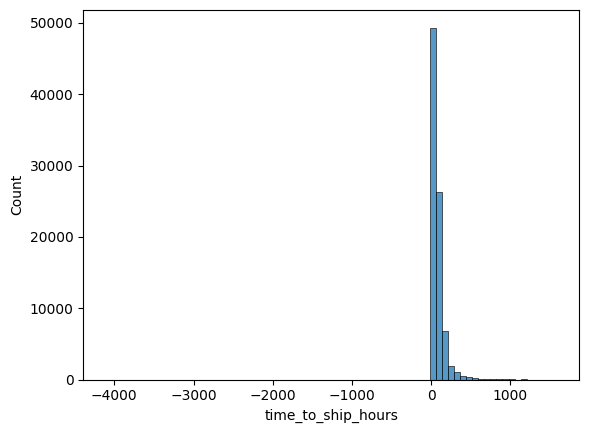

In [904]:
sns.histplot(X_train['time_to_ship_hours'], bins=75)
plt.show()

In [905]:
X_train['time_to_ship_hours'].describe()

count    86759.000000
mean        78.787235
std         87.077607
min      -4109.098056
25%         27.321528
50%         53.555556
75%         98.704722
max       1585.286944
Name: time_to_ship_hours, dtype: float64

In [906]:
X_train[X_train['time_to_ship_hours'] < 0]

,review_score,seller_grade,time_to_ship_hours,purchase_count,avg_review_score,order_purchase_timestamp,delay_category,freight_value_log,product_category_grouped
86427,5,1,-1.468889,15,4.409091,2018-08-16 16:45:08,On Time,2.271094,Electronics & Computers
30635,5,1,-0.924444,93,4.284211,2018-06-18 13:48:28,Early,3.331847,Sports / Outdoors / Garden
21558,4,1,-1.713889,83,4.047619,2018-06-18 14:04:50,Very Early,2.973487,Sports / Outdoors / Garden
30408,5,1,-1.246389,94,4.201923,2018-06-19 15:12:47,Very Early,2.649008,Home & Furniture
19669,5,1,-0.446667,174,3.804233,2018-06-26 11:24:48,Early,3.142858,Sports / Outdoors / Garden
...,...,...,...,...,...,...,...,...,...
86173,5,1,-0.076667,43,4.617021,2018-04-27 15:12:36,Very Early,3.406848,Home & Furniture
13428,4,1,-0.156944,907,3.849755,2018-05-29 14:07:25,Very Early,3.244544,Home & Furniture
70466,5,1,-0.454444,26,4.423077,2018-08-23 15:58:16,On Time,2.319442,Books
86472,4,1,-2.111111,3,3.750000,2018-07-06 11:54:40,Very Early,2.721953,Home & Furniture


#### As 183 rows are having time_to_ship_hours in negative(less then 0), it does not make any sense, so we will replace it with the mean of their particular group

In [907]:
# Replace negative values with NaN first
X_train.loc[df['time_to_ship_hours'] < 0, 'time_to_ship_hours'] = np.nan

# Fill NaN with the mean of their product_category_grouped
X_train['time_to_ship_hours'] = X_train.groupby('product_category_grouped')['time_to_ship_hours'].transform(lambda x: x.fillna(x.mean()))


In [908]:
X_train.head()

,review_score,seller_grade,time_to_ship_hours,purchase_count,avg_review_score,order_purchase_timestamp,delay_category,freight_value_log,product_category_grouped
861,5,1,24.609444,715,4.189048,2018-06-24 11:32:26,Very Early,3.258097,Electronics & Computers
44915,5,1,97.099444,653,4.167336,2018-08-24 13:33:02,On Time,2.230014,Sports & Leisure
26798,5,0,96.037500,12,3.076923,2018-02-22 14:47:02,Early,2.588516,Pet & Animals
104303,5,1,138.841667,36,4.277778,2018-07-18 19:01:30,Late,3.979121,Electronics & Computers
58404,5,1,50.598333,400,3.879630,2017-09-09 18:40:39,Very Early,2.553344,Misc / Other


In [909]:
(X_train['time_to_ship_hours'] < 0).sum()

np.int64(0)

In [910]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86759 entries, 861 to 71631
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   review_score              86759 non-null  int64  
 1   seller_grade              86759 non-null  int64  
 2   time_to_ship_hours        86759 non-null  float64
 3   purchase_count            86759 non-null  int64  
 4   avg_review_score          86759 non-null  float64
 5   order_purchase_timestamp  86759 non-null  object 
 6   delay_category            86759 non-null  object 
 7   freight_value_log         86759 non-null  float64
 8   product_category_grouped  86759 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 6.6+ MB


## purchase_count(train-split)

In [911]:
print(X_train['purchase_count'].describe())

count    86759.000000
mean       376.513491
std        489.744393
min          1.000000
25%         50.000000
50%        152.000000
75%        477.000000
max       1838.000000
Name: purchase_count, dtype: float64


In [912]:
print(X_train['purchase_count'].value_counts().sort_index())

purchase_count
1        451
2        527
3        579
4        610
5        619
        ... 
1308    1226
1399    1531
1698    1399
1785    1559
1838    1583
Name: count, Length: 244, dtype: int64


#### Purchase Count Handling

##### The `purchase_count` column contains extreme values and a large number of unique values, which can make modeling noisy and less interpretable.  
##### To address this, we categorize `purchase_count` into meaningful bins (e.g., Single, Small, Medium, Large, Very Large, Bulk Extreme), reducing variability while preserving the information about order size.  


In [913]:
def bin_purchase_count(x):
    if x == 1:
        return "Single"
    elif x <= 5:
        return "Small"
    elif x <= 20:
        return "Medium"
    elif x <= 100:
        return "Large"
    elif x <= 500:
        return "Very Large"
    else:
        return "Bulk Extreme"
X_train['purchase_count_binned'] = X_train['purchase_count'].apply(bin_purchase_count)


In [914]:
X_train['purchase_count_binned'].value_counts()

purchase_count_binned
Very Large      30573
Large           23841
Bulk Extreme    21429
Medium           8130
Small            2335
Single            451
Name: count, dtype: int64

In [915]:
X_train.drop('purchase_count', axis=1, inplace=True)

##### Applyting label Encoding

In [916]:
purchase_map = {"Single": 0,"Small": 1,"Medium": 2,"Large": 3,"Very Large": 4,"Bulk Extreme": 5}


In [917]:
X_train['purchase_count_binned'] = X_train['purchase_count_binned'].replace(purchase_map).astype(int)

C:\Users\shubu\AppData\Local\Temp\ipykernel_21240\449037171.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['purchase_count_binned'] = X_train['purchase_count_binned'].replace(purchase_map).astype(int)


In [918]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86759 entries, 861 to 71631
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   review_score              86759 non-null  int64  
 1   seller_grade              86759 non-null  int64  
 2   time_to_ship_hours        86759 non-null  float64
 3   avg_review_score          86759 non-null  float64
 4   order_purchase_timestamp  86759 non-null  object 
 5   delay_category            86759 non-null  object 
 6   freight_value_log         86759 non-null  float64
 7   product_category_grouped  86759 non-null  object 
 8   purchase_count_binned     86759 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 6.6+ MB


## avg_review_score(train-split)

In [919]:
X_train[['review_score','avg_review_score']].corr()

,review_score,avg_review_score
review_score,1.000000,0.264646
avg_review_score,0.264646,1.000000


### Review Score Features

- `review_score`: rating for the current order (1–5)  
- `avg_review_score`: historical average rating (1–5)  

Correlation is low (~0.26), so both provide useful info. 

In [920]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86759 entries, 861 to 71631
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   review_score              86759 non-null  int64  
 1   seller_grade              86759 non-null  int64  
 2   time_to_ship_hours        86759 non-null  float64
 3   avg_review_score          86759 non-null  float64
 4   order_purchase_timestamp  86759 non-null  object 
 5   delay_category            86759 non-null  object 
 6   freight_value_log         86759 non-null  float64
 7   product_category_grouped  86759 non-null  object 
 8   purchase_count_binned     86759 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 6.6+ MB


## order_purchase_timestamp(train-split)

#### Datetime Feature Engineering

The `order_purchase_timestamp` column is decomposed into multiple features and encoded cyclically to capture periodic patterns:

- **Extracted features:** year, month, day, weekday, hour  
- **Cyclical encoding:** month, weekday, hour, and optionally day are transformed using sine and cosine to reflect their circular nature (e.g., December → January, Sunday → Monday)  
- **Redundant columns dropped:** original timestamp and numeric intermediate columns (month, weekday, hour, day)  
- **Purpose:** This allows the model to capture seasonal, weekly, and daily patterns without misinterpreting linear numeric values.


In [921]:
X_train['order_purchase_timestamp'].dtype

dtype('O')

In [922]:
X_train['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [923]:
X_train['order_purchase_timestamp'].dtype

dtype('<M8[ns]')

In [924]:
# Extract datetime features
X_train['order_year'] = X_train['order_purchase_timestamp'].dt.year
X_train['order_month'] = X_train['order_purchase_timestamp'].dt.month
X_train['order_day'] = X_train['order_purchase_timestamp'].dt.day
X_train['order_weekday'] = X_train['order_purchase_timestamp'].dt.weekday
X_train['order_hour'] = X_train['order_purchase_timestamp'].dt.hour

# Cyclical encoding for periodic features
X_train['month_sin'] = np.sin(2 * np.pi * X_train['order_month'] / 12)
X_train['month_cos'] = np.cos(2 * np.pi * X_train['order_month'] / 12)
X_train['weekday_sin'] = np.sin(2 * np.pi * X_train['order_weekday'] / 7)
X_train['weekday_cos'] = np.cos(2 * np.pi * X_train['order_weekday'] / 7)
X_train['day_sin'] = np.sin(2 * np.pi * X_train['order_day'] / 31)
X_train['day_cos'] = np.cos(2 * np.pi * X_train['order_day'] / 31)
X_train['hour_sin'] = np.sin(2 * np.pi * X_train['order_hour'] / 24)
X_train['hour_cos'] = np.cos(2 * np.pi * X_train['order_hour'] / 24)

In [925]:
X_train.drop(['order_purchase_timestamp','order_month','order_weekday','order_hour','order_day','order_year'],axis = 1,inplace = True)

In [926]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86759 entries, 861 to 71631
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   review_score              86759 non-null  int64  
 1   seller_grade              86759 non-null  int64  
 2   time_to_ship_hours        86759 non-null  float64
 3   avg_review_score          86759 non-null  float64
 4   delay_category            86759 non-null  object 
 5   freight_value_log         86759 non-null  float64
 6   product_category_grouped  86759 non-null  object 
 7   purchase_count_binned     86759 non-null  int64  
 8   month_sin                 86759 non-null  float64
 9   month_cos                 86759 non-null  float64
 10  weekday_sin               86759 non-null  float64
 11  weekday_cos               86759 non-null  float64
 12  day_sin                   86759 non-null  float64
 13  day_cos                   86759 non-null  float64
 14  hour_sin 

# Working on each column (for test-Split)

## Delivery_delay_hours(test-split)

In [927]:
# Use the same quantiles from X_train
# q25, q50, q75, q95 already computed from X_train

# Define the same categorization function
def categorize_delay_test(x):
    if -72 <= x <= 72:  # strictly define "On Time"
        return 'On Time'
    elif x <= q25:
        return 'Very Early'
    elif q25 < x <= q50:
        return 'Early'
    elif q50 < x <= q75:
        return 'Early'
    elif q75 < x <= q95:
        return 'Late'
    else:
        return 'Very Late'

# Apply function to X_test
X_test['delay_category'] = X_test['delivery_delay_hours'].apply(categorize_delay_test)

# Drop the original column
X_test.drop(['delivery_delay_hours'], axis=1, inplace=True)

# Check results
print(X_test['delay_category'].value_counts())


delay_category
Early         10766
Very Early     5443
Late           2813
On Time        1600
Very Late      1068
Name: count, dtype: int64


## Review Score(test-split)

##### The review_score feature is slightly skewed towards higher values (4 and 5). During model training, class weights are applied to account for this imbalance, while the test set values remain unchanged to ensure consistent evaluation.

## freight_value(test-split)

In [928]:
# Apply the same log1p transformation to X_test
X_test['freight_value_log'] = np.log1p(X_test['freight_value'])

# Drop the original column
X_test.drop(['freight_value'], axis=1, inplace=True)

## Seller_grade(test-split)

In [929]:
# Apply the same label encoding to X_test
X_test['seller_grade'] = X_test['seller_grade'].replace(label_map).astype(int)

C:\Users\shubu\AppData\Local\Temp\ipykernel_21240\2759188110.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['seller_grade'] = X_test['seller_grade'].replace(label_map).astype(int)


## product_category_name_english(test-split)

In [930]:
# Apply the same group mapping to X_test
X_test['product_category_grouped'] = X_test['product_category_name_english'].map(group_mapping)

# Drop the original column
X_test.drop(['product_category_name_english'], axis=1, inplace=True)

# Optional: check results
print(X_test['product_category_grouped'].value_counts())

product_category_grouped
Home & Furniture              6641
Electronics & Computers       3265
Sports & Leisure              2779
Health & Beauty               2599
Sports / Outdoors / Garden    1732
Fashion & Accessories         1641
Misc / Other                  1096
Books                          641
Baby & Kids                    607
Pet & Animals                  390
Food & Drink                   213
Arts & Crafts                   58
Party & Seasonal                28
Name: count, dtype: int64


## time_to_ship_hours(test-split)

In [931]:
# Replace negative values with NaN
X_test.loc[X_test['time_to_ship_hours'] < 0, 'time_to_ship_hours'] = np.nan

# Fill NaN with the mean of their product_category_grouped
X_test['time_to_ship_hours'] = X_test.groupby('product_category_grouped')['time_to_ship_hours'].transform(lambda x: x.fillna(x.mean()))

# Check that no negative values remain
print((X_test['time_to_ship_hours'] < 0).sum())

0


## purchase_count(test-split)

In [932]:
# Apply the same binning function
X_test['purchase_count_binned'] = X_test['purchase_count'].apply(bin_purchase_count)

# Drop the original column
X_test.drop('purchase_count', axis=1, inplace=True)

# Apply the same label mapping
purchase_map = {"Single": 0, "Small": 1, "Medium": 2, "Large": 3, "Very Large": 4, "Bulk Extreme": 5}
X_test['purchase_count_binned'] = X_test['purchase_count_binned'].replace(purchase_map).astype(int)

# Optional: check result
print(X_test['purchase_count_binned'].value_counts())

purchase_count_binned
4    7654
3    5967
5    5380
2    1993
1     573
0     123
Name: count, dtype: int64


C:\Users\shubu\AppData\Local\Temp\ipykernel_21240\1816582145.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['purchase_count_binned'] = X_test['purchase_count_binned'].replace(purchase_map).astype(int)


## avg_review_score(test-split)

##### For the test set, review_score and avg_review_score are kept unchanged to match the training set, ensuring consistent feature representation for model prediction.

## order_purchase_timestamp(test-split)

In [933]:
# Ensure the timestamp is datetime
X_test['order_purchase_timestamp'] = pd.to_datetime(X_test['order_purchase_timestamp'])

# Extract datetime features
X_test['order_year'] = X_test['order_purchase_timestamp'].dt.year
X_test['order_month'] = X_test['order_purchase_timestamp'].dt.month
X_test['order_day'] = X_test['order_purchase_timestamp'].dt.day
X_test['order_weekday'] = X_test['order_purchase_timestamp'].dt.weekday
X_test['order_hour'] = X_test['order_purchase_timestamp'].dt.hour

# Cyclical encoding
X_test['month_sin'] = np.sin(2 * np.pi * X_test['order_month'] / 12)
X_test['month_cos'] = np.cos(2 * np.pi * X_test['order_month'] / 12)
X_test['weekday_sin'] = np.sin(2 * np.pi * X_test['order_weekday'] / 7)
X_test['weekday_cos'] = np.cos(2 * np.pi * X_test['order_weekday'] / 7)
X_test['day_sin'] = np.sin(2 * np.pi * X_test['order_day'] / 31)
X_test['day_cos'] = np.cos(2 * np.pi * X_test['order_day'] / 31)
X_test['hour_sin'] = np.sin(2 * np.pi * X_test['order_hour'] / 24)
X_test['hour_cos'] = np.cos(2 * np.pi * X_test['order_hour'] / 24)

# Drop original timestamp and intermediate numeric columns
X_test.drop(['order_purchase_timestamp', 'order_month', 'order_weekday', 'order_hour', 'order_day', 'order_year'], axis=1, inplace=True)

# Ohe(delay_category and product_category_grouped)(train-split and test-split)

In [934]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86759 entries, 861 to 71631
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   review_score              86759 non-null  int64  
 1   seller_grade              86759 non-null  int64  
 2   time_to_ship_hours        86759 non-null  float64
 3   avg_review_score          86759 non-null  float64
 4   delay_category            86759 non-null  object 
 5   freight_value_log         86759 non-null  float64
 6   product_category_grouped  86759 non-null  object 
 7   purchase_count_binned     86759 non-null  int64  
 8   month_sin                 86759 non-null  float64
 9   month_cos                 86759 non-null  float64
 10  weekday_sin               86759 non-null  float64
 11  weekday_cos               86759 non-null  float64
 12  day_sin                   86759 non-null  float64
 13  day_cos                   86759 non-null  float64
 14  hour_sin 

In [935]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21690 entries, 53646 to 67430
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   review_score              21690 non-null  int64  
 1   seller_grade              21690 non-null  int64  
 2   time_to_ship_hours        21690 non-null  float64
 3   avg_review_score          21690 non-null  float64
 4   delay_category            21690 non-null  object 
 5   freight_value_log         21690 non-null  float64
 6   product_category_grouped  21690 non-null  object 
 7   purchase_count_binned     21690 non-null  int64  
 8   month_sin                 21690 non-null  float64
 9   month_cos                 21690 non-null  float64
 10  weekday_sin               21690 non-null  float64
 11  weekday_cos               21690 non-null  float64
 12  day_sin                   21690 non-null  float64
 13  day_cos                   21690 non-null  float64
 14  hour_si

In [936]:
# Manual OHE for product_category_grouped
product_dummies_train = pd.get_dummies(X_train['product_category_grouped'], prefix='product_category_grouped', drop_first=False)
product_dummies_test = pd.get_dummies(X_test['product_category_grouped'], prefix='product_category_grouped', drop_first=False)

In [937]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
product_dummies_train = product_dummies_train.reset_index(drop=True)
product_dummies_test = product_dummies_test.reset_index(drop=True)

In [938]:
X_train = pd.concat([X_train, product_dummies_train], axis=1)
X_test = pd.concat([X_test, product_dummies_test], axis=1)

In [939]:
# Column to OHE
ohe_cols = ['delay_category']

# One-hot encode train
X_train = pd.get_dummies(X_train, columns=ohe_cols, drop_first=False)

# One-hot encode test using the same columns as train
X_test = pd.get_dummies(X_test, columns=ohe_cols, drop_first=False)

# Align columns (add missing columns in X_test)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


# Train-Test Consistency Check

In [940]:
print("X_train:", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train:", y_train.shape)
print("y_test: ", y_test.shape)

X_train: (86759, 33)
X_test:  (21690, 33)
y_train: (86759,)
y_test:  (21690,)


In [941]:
if list(X_train.columns) == list(X_test.columns):
    print("X_train and X_test columns match")
else:
    print("Column mismatch")

X_train and X_test columns match


In [942]:
X_train.head()

,review_score,seller_grade,time_to_ship_hours,avg_review_score,freight_value_log,product_category_grouped,purchase_count_binned,month_sin,month_cos,weekday_sin,...,product_category_grouped_Misc / Other,product_category_grouped_Party & Seasonal,product_category_grouped_Pet & Animals,product_category_grouped_Sports & Leisure,product_category_grouped_Sports / Outdoors / Garden,delay_category_Early,delay_category_Late,delay_category_On Time,delay_category_Very Early,delay_category_Very Late
0,5,1,24.609444,4.189048,3.258097,Electronics & Computers,5,1.224647e-16,-1.000000e+00,-0.781831,...,False,False,False,False,False,False,False,False,True,False
1,5,1,97.099444,4.167336,2.230014,Sports & Leisure,5,-8.660254e-01,-5.000000e-01,-0.433884,...,False,False,False,True,False,False,False,True,False,False
2,5,0,96.037500,3.076923,2.588516,Pet & Animals,2,8.660254e-01,5.000000e-01,0.433884,...,False,False,True,False,False,True,False,False,False,False
3,5,1,138.841667,4.277778,3.979121,Electronics & Computers,3,-5.000000e-01,-8.660254e-01,0.974928,...,False,False,False,False,False,False,True,False,False,False
4,5,1,50.598333,3.879630,2.553344,Misc / Other,4,-1.000000e+00,-1.836970e-16,-0.974928,...,True,False,False,False,False,False,False,False,True,False


In [943]:
X_train.isna().sum().sum(), X_test.isna().sum().sum(), y_train.isna().sum(), y_test.isna().sum()

(np.int64(0), np.int64(0), np.int64(0), np.int64(0))

In [944]:
X_train.dtypes.value_counts()

bool       18
float64    11
int64       3
object      1
Name: count, dtype: int64

In [945]:
# Align columns of test set with train set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Model Building

In [946]:
X_train.head()

,review_score,seller_grade,time_to_ship_hours,avg_review_score,freight_value_log,product_category_grouped,purchase_count_binned,month_sin,month_cos,weekday_sin,...,product_category_grouped_Misc / Other,product_category_grouped_Party & Seasonal,product_category_grouped_Pet & Animals,product_category_grouped_Sports & Leisure,product_category_grouped_Sports / Outdoors / Garden,delay_category_Early,delay_category_Late,delay_category_On Time,delay_category_Very Early,delay_category_Very Late
0,5,1,24.609444,4.189048,3.258097,Electronics & Computers,5,1.224647e-16,-1.000000e+00,-0.781831,...,False,False,False,False,False,False,False,False,True,False
1,5,1,97.099444,4.167336,2.230014,Sports & Leisure,5,-8.660254e-01,-5.000000e-01,-0.433884,...,False,False,False,True,False,False,False,True,False,False
2,5,0,96.037500,3.076923,2.588516,Pet & Animals,2,8.660254e-01,5.000000e-01,0.433884,...,False,False,True,False,False,True,False,False,False,False
3,5,1,138.841667,4.277778,3.979121,Electronics & Computers,3,-5.000000e-01,-8.660254e-01,0.974928,...,False,False,False,False,False,False,True,False,False,False
4,5,1,50.598333,3.879630,2.553344,Misc / Other,4,-1.000000e+00,-1.836970e-16,-0.974928,...,True,False,False,False,False,False,False,False,True,False


In [947]:
X_train_model = X_train.drop(columns=['product_category_grouped'])
X_test_model = X_test.drop(columns=['product_category_grouped'])

In [948]:
xgb_model = XGBRegressor(
    n_estimators=1500,          # more trees, will stop early if no improvement
    learning_rate=0.03,         # slower learning for smoother convergence
    max_depth=5,                # reduce depth to prevent overfitting
    min_child_weight=4,         # require more samples per leaf
    subsample=0.8,              # row sampling
    colsample_bytree=0.8,       # feature sampling per tree
    gamma=2,                     # higher min loss reduction
    reg_alpha=0.2,               # L1 regularization
    reg_lambda=2,                # L2 regularization
    objective='reg:squarederror',
    random_state=16501,
    n_jobs=-1,
    tree_method='hist'
)

In [949]:
xgb_model.fit(X_train_model, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [950]:
y_pred = xgb_model.predict(X_test_model)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)   # manually take square root
print("RMSE:", rmse)

RMSE: 129.75797712099296


In [951]:
# Predict on train and test
y_train_pred = xgb_model.predict(X_train_model)
y_test_pred = xgb_model.predict(X_test_model)

# Training metrics
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train R2:", r2_score(y_train, y_train_pred))

# Test metrics
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test R2:", r2_score(y_test, y_test_pred))


Train MSE: 10863.808662755004
Train MAE: 52.587813316134806
Train R2: 0.6706836479984752
Test MSE: 16837.132626532133
Test MAE: 57.92323327297656
Test R2: 0.4555916272357845


In [959]:
with open("model/xgb_price_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)
